In [5]:
import torch
import numpy as np
import pylab as plt
from swag import SWAG

In [342]:
# Toy Dataset

x = np.arange(-10,7,0.2)
x = torch.tensor(x,dtype=torch.float).unsqueeze(1)

def f(x):
    return 0.5*x**2 -x*torch.exp(0.1*x)+5*torch.sin(x)
y = f(x) + torch.randn(size = x.shape)*3

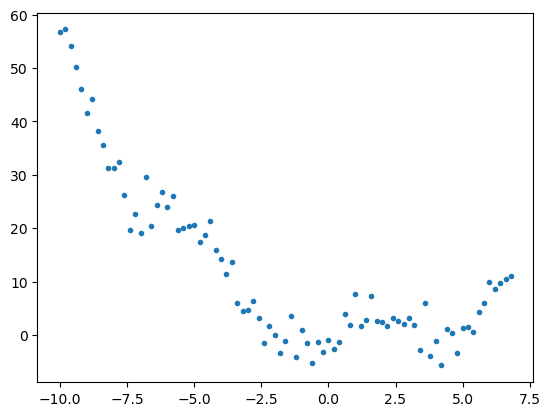

In [343]:
plt.plot(x,y,'.')

In [344]:
import torch.nn as nn
class MLP(nn.Module):
    def __init__( self) :
        super().__init__ ()
        self.fc1 = nn.Linear(1,16)
        self.fc2 = nn.Linear(16,64)
        self.fc3 = nn.Linear(64,32)
        self.fc4 = nn.Linear(32,1)
        
    def forward ( self , x ) :
        output1 = torch.relu(self.fc1(x))
        output2 = torch.relu(self.fc2(output1))
        output3= torch.relu(self.fc3(output2))
        
        return self.fc4(output3)

In [345]:
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
dataset = TensorDataset(x, y)
dataloader = DataLoader(dataset, batch_size=20, shuffle=True)

# Model, loss, optimizer
model = MLP()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 60
for epoch in range(epochs):
    model.train()
    total_loss = 0.0
    for x_batch, y_batch in dataloader:
        optimizer.zero_grad()
        predictions = model(x_batch)
        loss = criterion(predictions, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(dataloader)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

print("Training complete!")

Epoch [1/60], Loss: 342.7011
Epoch [2/60], Loss: 224.5223
Epoch [3/60], Loss: 73.5579
Epoch [4/60], Loss: 74.7792
Epoch [5/60], Loss: 57.8698
Epoch [6/60], Loss: 44.0271
Epoch [7/60], Loss: 33.8759
Epoch [8/60], Loss: 40.5070
Epoch [9/60], Loss: 32.7200
Epoch [10/60], Loss: 46.3196
Epoch [11/60], Loss: 31.4563
Epoch [12/60], Loss: 28.5955
Epoch [13/60], Loss: 40.6680
Epoch [14/60], Loss: 25.4353
Epoch [15/60], Loss: 27.7120
Epoch [16/60], Loss: 25.9444
Epoch [17/60], Loss: 31.6348
Epoch [18/60], Loss: 17.9946
Epoch [19/60], Loss: 17.7488
Epoch [20/60], Loss: 17.3849
Epoch [21/60], Loss: 17.1707
Epoch [22/60], Loss: 25.9162
Epoch [23/60], Loss: 17.3934
Epoch [24/60], Loss: 16.8654
Epoch [25/60], Loss: 17.1611
Epoch [26/60], Loss: 22.4015
Epoch [27/60], Loss: 15.8716
Epoch [28/60], Loss: 17.0759
Epoch [29/60], Loss: 18.1146
Epoch [30/60], Loss: 14.5717
Epoch [31/60], Loss: 14.5730
Epoch [32/60], Loss: 17.9791
Epoch [33/60], Loss: 19.7582
Epoch [34/60], Loss: 17.6978
Epoch [35/60], Loss: 

In [346]:
x_pred = torch.linspace(-10, 10, 100).unsqueeze(1)
pred = model(x_pred).detach().numpy()

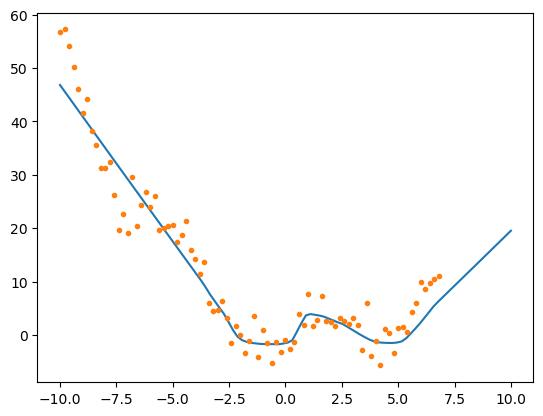

In [347]:
plt.plot(x_pred,pred)
plt.plot(x,y,'.')

In [379]:
a = SWAG(model)
lr = 5e-4
optimizer = optim.SGD(a.model.parameters(),lr=lr)
criterion = nn.MSELoss()
T = 100

a.compute_SWA(dataloader,optimizer,criterion,T)

In [380]:

means,std,_ = a.sample_models(x=x_pred,S=100)


(array([32., 19.,  9.,  9.,  1.,  2.,  1.,  1.,  2., 24.]),
 array([0.11431103, 0.55267096, 0.99103087, 1.42939067, 1.86775064,
        2.30611062, 2.74447036, 3.18283033, 3.62119031, 4.05955029,
        4.4979105 ]),
 <BarContainer object of 10 artists>)

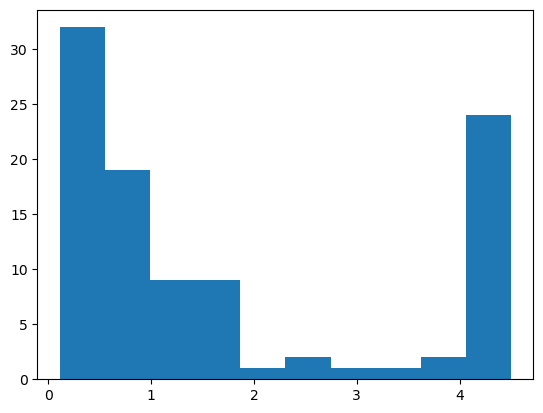

In [381]:
plt.hist(std)

(-12.0, 10.0)

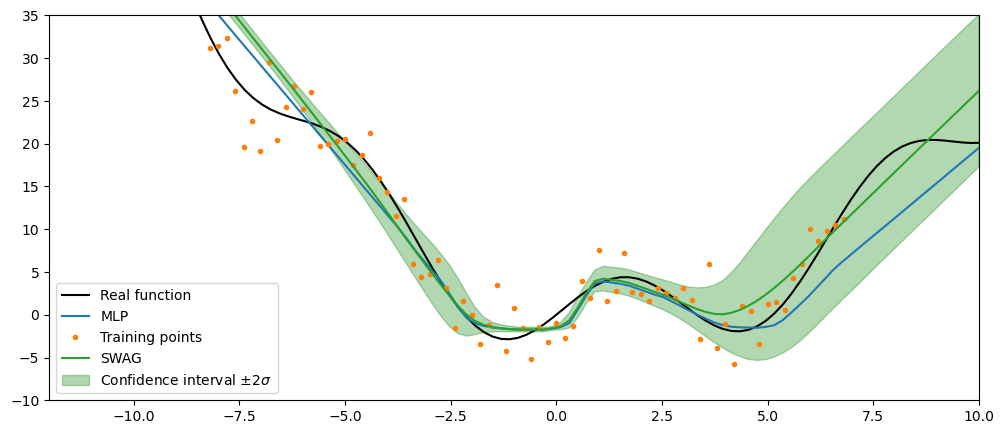

In [382]:
fig,ax = plt.subplots(1,1,figsize=(12,5))
ax.plot(x_pred,f(x_pred),color='black',label = 'Real function')
ax.plot(x_pred,pred, label = 'MLP')
ax.plot(x,y,'.',label='Training points')

ax.plot(x_pred.detach().numpy(),means,label='SWAG')
ax.fill_between(x=x_pred.squeeze(), y1=(means.squeeze() - 2*std.squeeze()), y2=(means.squeeze() + 2*std.squeeze()), color='green',alpha=0.3, label=r'Confidence interval $\pm 2\sigma$')
ax.legend()
ax.set_ylim(-10,35)
ax.set_xlim(-12,10)